In [43]:
import os
import re
import csv
import numpy as np


In [44]:
cwd = os.getcwd()

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# preapre CSV

In [46]:
# benchmark_path = "/Users/u7826985/Projects/Nvidia/results/composite_hadamard_optimization"
AA_folder ="100taxa_diff_trees_1M_sites_AA"
DNA_folder ="100taxa_diff_trees_1M_sites"

In [47]:
last_results_path = "/Users/u7826985/Projects/Nvidia/results/2026_02_17_openACC_vs_cublas"
results_path = "/Users/u7826985/Projects/Nvidia/results/2026_02_23_2kernels"
output_csv = f"{results_path}/results.csv"
output_csv_aa = f"{results_path}/results_aa.csv"

In [48]:
# Regex to capture the RESULT line
pattern = re.compile(
    r"\[RESULT\]\s*backend=(\w+)\s+taxa=(\d+)\s+sites=(\d+)\s+patterns=(\d+)\s+time=([\d\.e\+\-]+)s\s+likelihood=([\-.\deE]+)"
)


In [49]:
#read files in results_path

def read_files_in_las_reults_directory(directory, unique_name=""):
    for i in range(1, 11):
        tree_folder = f"{directory}/tree_{i}"
        files = os.listdir(tree_folder)
        op_type=""
        for file in files:
            if file.startswith("output_v100_cudaCublas_run"):
                op_type="CUDA_OLD"
            elif (file.startswith("output_v100_openACC_run") or file.startswith("output_v100_OpenACC_run")):
                op_type="OpenACC"
            else:
                continue
            if file.endswith('.txt'):
                print(f"Reading file: {file}")
                with open(f'{tree_folder}/{file}', 'r') as f:
                    #get treefile name from the txt file name
                    tree_file_name = file.split("_")[4] + "_" + file.split("_")[5]
                    # detect file name contains "a100"
                    run_number = file.split("_")[3]
                    print(tree_file_name)
                    
                    
                    
                    h200 = False
                    a100 = False
                    transposed = False
                    if "h200" in file.split("_")[-1]:
                        h200 = True
                    
                    elif "a100" in file.split("_")[-1]:
                        a100 = True
                        continue
                        
                    for line in f:
                        match = pattern.search(line)
                        if match:
                            print("found a match")
                            backend, taxa, sites, patterns, time, likelihood = match.groups()
                            backend = op_type
                            print(backend)
                            if h200:
                                backend += "_H200"
                            elif a100:
                                backend += "_A100"
                            else:
                                backend += "_V100"
                           
                                
                            # if taxa != "100":
                            #     continue
                            # backend = op_type
                            data.append([backend, taxa, sites, patterns, likelihood, time, tree_file_name, run_number])
                            
                            print(backend, taxa, sites, patterns, likelihood, time, tree_file_name, run_number)
    
                            # Write to CSV
                            # with open(output_csv, 'w', newline='') as csvfile:
                            #     writer = csv.writer(csvfile)
                            #     writer.writerow(["backend", "taxa", "sites", "patterns", "likelihood", "time"])
                            #     writer.writerows(data)

    print(f"Extracted {len(data)} results to {output_csv}")



In [50]:
#read files in results_path

def read_files_in_directory(directory, unique_name=""):
    for i in range(1, 11):
        tree_folder = f"{directory}/tree_{i}"
        files = os.listdir(tree_folder)

        for file in files:
            
            if file.endswith('.txt'):
                print(f"Reading file: {file}")
                with open(f'{tree_folder}/{file}', 'r') as f:
                    #get treefile name from the txt file name
                    tree_file_name = file.split("_")[4] + "_" + file.split("_")[5]
                    # detect file name contains "a100"
                    run_number = file.split("_")[3]
                    print(tree_file_name)
                    
                    
                    
                    h200 = False
                    a100 = False
                    transposed = False
                    if "h200" in file.split("_")[-1]:
                        h200 = True
                    
                    elif "a100" in file.split("_")[-1]:
                        a100 = True
                        continue
                        
                    for line in f:
                        match = pattern.search(line)
                        if match:
                            print("found a match")
                            backend, taxa, sites, patterns, time, likelihood = match.groups()
                            backend = "CUDA"
                            print(backend)
                            if h200:
                                backend += "_H200"
                            elif a100:
                                backend += "_A100"
                            else:
                                backend += "_V100"
                           
                                
                            # if taxa != "100":
                            #     continue
                            # backend = op_type
                            data.append([backend, taxa, sites, patterns, likelihood, time, tree_file_name, run_number])
                            
                            print(backend, taxa, sites, patterns, likelihood, time, tree_file_name, run_number)
    
                            # Write to CSV
                            # with open(output_csv, 'w', newline='') as csvfile:
                            #     writer = csv.writer(csvfile)
                            #     writer.writerow(["backend", "taxa", "sites", "patterns", "likelihood", "time"])
                            #     writer.writerows(data)

    print(f"Extracted {len(data)} results to {output_csv}")



In [51]:
alignment_pattern = re.compile(r"Alignment has (\d+) sequences with (\d+) columns, (\d+) distinct patterns")
likelihood_pattern = re.compile(r"Initial log-likelihood:\s+([-0-9.]+).*?took ([0-9.]+) wall-clock sec")

# Data list
# data = []


In [52]:
# Write to CSV

def write_to_csv(data, output_csv):
    with open(output_csv, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["backend", "taxa", "sites", "patterns", "likelihood", "time","treefile", "run_number"])
        writer.writerows(data)
        
        


In [53]:
def plot_average_time_per_backend(df, logy=False, path=""):
    groups = df.groupby(['treefile', 'backend'])
    mean_times = groups['time'].mean().unstack()
    mean_times.plot(kind='bar', figsize=(10, 5))
    if logy:
        plt.yscale('log')
    plt.xlabel('Tree File')
    plt.ylabel('Average Time (s)')
    plt.title('Average Time per Backend for Each Tree File')
    plt.tight_layout()
    if path:
        plt.savefig(path)
    plt.show()


def plot_boxplot_time_per_backend(df, logy=False, path=""):
    plt.figure(figsize=(10, 5))
    df.boxplot(column='time', by='backend')
    if logy:
        plt.yscale('log')
    plt.xlabel('Backend')
    plt.ylabel('Time (s)')
    plt.title('Time Distribution per Backend')
    plt.suptitle('')
    plt.tight_layout()
    if path:
        plt.savefig(path)
    plt.show()
    
def boxplot_per_tree_group_backend(df):
    # plot per tree file boxplot grouped by backend
    tree_files = df['treefile'].unique()
    for tree_file in tree_files:
        plt.figure(figsize=(10, 5))
        df_tree = df[df['treefile'] == tree_file]
        df_tree.boxplot(column='time', by='backend')
        plt.xlabel('Backend')
        plt.ylabel('Time (s)')
        plt.title(f'Time Distribution per Backend for {tree_file}')
        plt.suptitle('')
        plt.tight_layout()
        plt.show()

In [54]:
def plot_average_time_per_backend_v100(df, logy=False, path=""):
    # get only v100 backends
    df = df[df['backend'].str.contains('V100')]
    groups = df.groupby(['treefile', 'backend'])
    mean_times = groups['time'].mean().unstack()
    mean_times.plot(kind='bar', figsize=(10, 5))
    if logy:
        plt.yscale('log')
    plt.xlabel('Tree File')
    plt.ylabel('Average Time (s)')
    plt.title('Average Time per Backend for Each Tree File')
    plt.tight_layout()
    if path:
        plt.savefig(path)
    plt.show()



In [55]:
def plot_runtime_boxplot_auto(
    df,
    tree_col=None,
    backend_col=None,
    time_col=None,
    backend_cols=None,          # for wide format: list of backend columns
    figsize=(14, 6),
    show_outliers=True,
    title="Runtime Distribution per Tree per Backend",
    rotate_xticks=45,
    path=""
):
    """
    Auto boxplot for runtime vs tree grouped by backend.
    Works with:
      - LONG format: [tree, backend, time]
      - WIDE format: [tree, CUDA_V100, OpenACC_V100, ...] (multiple runs/rows per tree)
    """

    df = df.copy()

    # ---- 1) Detect columns if not provided ----
    cols = list(df.columns)

    # Guess tree column
    if tree_col is None:
        for c in cols:
            lc = c.lower()
            if lc in ("tree", "tree_file", "treefile", "tree_id", "treeid", "file"):
                tree_col = c
                break
        if tree_col is None:
            # fallback: first non-numeric column
            non_numeric = [c for c in cols if not pd.api.types.is_numeric_dtype(df[c])]
            tree_col = non_numeric[0] if non_numeric else cols[0]

    # If user explicitly gave wide backend columns, treat as wide
    if backend_cols is not None:
        wide_backend_cols = backend_cols
    else:
        wide_backend_cols = None

    # Determine if long format is available
    has_long = (
        (backend_col is not None and backend_col in df.columns) or
        any(c.lower() in ("backend", "impl", "implementation") for c in cols)
    ) and (
        (time_col is not None and time_col in df.columns) or
        any(c.lower() in ("time", "runtime", "elapsed", "elapsed_time", "seconds", "sec", "min_time") for c in cols)
    )

    # ---- 2) If long-format, use it ----
    if has_long:
        if backend_col is None:
            backend_col = next(c for c in cols if c.lower() in ("backend", "impl", "implementation"))
        if time_col is None:
            time_col = next(c for c in cols if c.lower() in ("time", "runtime", "elapsed", "elapsed_time", "seconds", "sec", "min_time"))

        plot_df = df[[tree_col, backend_col, time_col]].copy()
        plot_df[time_col] = pd.to_numeric(plot_df[time_col], errors="coerce")
        plot_df = plot_df.dropna(subset=[time_col])

        x, y, h = tree_col, time_col, backend_col

    # ---- 3) Otherwise assume wide-format and melt ----
    else:
        if wide_backend_cols is None:
            # pick numeric columns excluding the tree column as backend columns
            wide_backend_cols = [c for c in cols if c != tree_col]
            # keep only columns that look numeric-ish after coercion
            keep = []
            for c in wide_backend_cols:
                s = pd.to_numeric(df[c], errors="coerce")
                if s.notna().any():
                    keep.append(c)
            wide_backend_cols = keep

        if not wide_backend_cols:
            raise ValueError(
                f"Couldn't infer backend/time columns.\n"
                f"Columns seen: {cols}\n"
                f"Try providing: backend_cols=[...], and tree_col='...'"
            )

        plot_df = df[[tree_col] + wide_backend_cols].copy()
        plot_df = plot_df.melt(id_vars=[tree_col], value_vars=wide_backend_cols,
                               var_name="backend", value_name="time")
        plot_df["time"] = pd.to_numeric(plot_df["time"], errors="coerce")
        plot_df = plot_df.dropna(subset=["time"])

        x, y, h = tree_col, "time", "backend"

    # ---- 4) Plot ----
    plt.figure(figsize=figsize)
    sns.boxplot(data=plot_df, x=x, y=y, hue=h, showfliers=show_outliers)

    plt.title(title)
    plt.xlabel("Tree File")
    plt.ylabel("Time (s)")
    plt.xticks(rotation=rotate_xticks)
    plt.legend(title="Backend")
    plt.tight_layout()
    if path:
        plt.savefig(path)
    plt.show()

    # helpful debug info
    print("Using columns ->", {"tree": x, "backend": h, "time": y})
    print("Rows plotted:", len(plot_df))

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_bar_with_box(df,
                      tree_col="treefile",
                      time_col="time",
                      backend_col="backend",
                      figsize=(14,6), path=""):
    """
    Plots boxplot (distribution) with mean bar overlay.
    """

    plt.figure(figsize=figsize)

    # --- Boxplot (distribution) ---
    sns.boxplot(
        data=df,
        x=tree_col,
        y=time_col,
        hue=backend_col,
        showfliers=False,
        linewidth=1
    )

    # --- Barplot (mean overlay) ---
    sns.barplot(
        data=df,
        x=tree_col,
        y=time_col,
        hue=backend_col,
        estimator="mean",
        errorbar=None,
        alpha=0.4,
        dodge=True
    )

    plt.title("Runtime Distribution + Mean per Tree per Backend")
    plt.xticks(rotation=45)
    plt.ylabel("Time (s)")
    plt.xlabel("Tree File")

    # Fix duplicate legends (because both plots create one)
    handles, labels = plt.gca().get_legend_handles_labels()
    n = len(df[backend_col].unique())
    plt.legend(handles[:n], labels[:n], title="Backend")

    plt.tight_layout()
    if path:
        plt.savefig(path)
    plt.show()


# Analysis of Results

In [57]:
data = []

In [58]:
# read_files_in_directory(f"{benchmark_path}/{AA_folder}", unique_name="_BENCHMARK")
read_files_in_directory(f"{results_path}/{AA_folder}", unique_name="_GPU")
read_files_in_las_reults_directory(f"{last_results_path}/{AA_folder}", unique_name="_OLDGPU")

write_to_csv(data, output_csv)

Reading file: output_v100_2cudakernels_run2_tree_1_1000000_aa_cublas_v100.txt
tree_1
found a match
CUDA
CUDA_V100 100 1000000 1000000 -110413195.778517335653305 1.607069372000000 tree_1 run2
Reading file: output_v100_2cudakernels_run3_tree_1_1000000_aa_cublas_v100.txt
tree_1
found a match
CUDA
CUDA_V100 100 1000000 1000000 -110413195.778517335653305 1.505870550000000 tree_1 run3
Reading file: output_v100_2cudakernels_run1_tree_1_1000000_aa_cublas_v100.txt
tree_1
found a match
CUDA
CUDA_V100 100 1000000 1000000 -110413195.778517276048660 1.556145281000000 tree_1 run1
Reading file: output_v100_2cudakernels_run7_tree_1_1000000_aa_cublas_v100.txt
tree_1
found a match
CUDA
CUDA_V100 100 1000000 1000000 -110413195.778517305850983 1.527318208000000 tree_1 run7
Reading file: output_v100_2cudakernels_run10_tree_1_1000000_aa_cublas_v100.txt
tree_1
found a match
CUDA
CUDA_V100 100 1000000 1000000 -110413195.778517365455627 1.603195127000000 tree_1 run10
Reading file: output_v100_2cudakernels_run8

In [59]:
# Read the CSV file into a DataFrame
df = pd.read_csv(output_csv)
# Display the first few rows of the DataFrame
df.head()

,backend,taxa,sites,patterns,likelihood,time,treefile,run_number
0,CUDA_V100,100,1000000,1000000,-1.104132e+08,1.607069,tree_1,run2
1,CUDA_V100,100,1000000,1000000,-1.104132e+08,1.505871,tree_1,run3
2,CUDA_V100,100,1000000,1000000,-1.104132e+08,1.556145,tree_1,run1
3,CUDA_V100,100,1000000,1000000,-1.104132e+08,1.527318,tree_1,run7
4,CUDA_V100,100,1000000,1000000,-1.104132e+08,1.603195,tree_1,run10


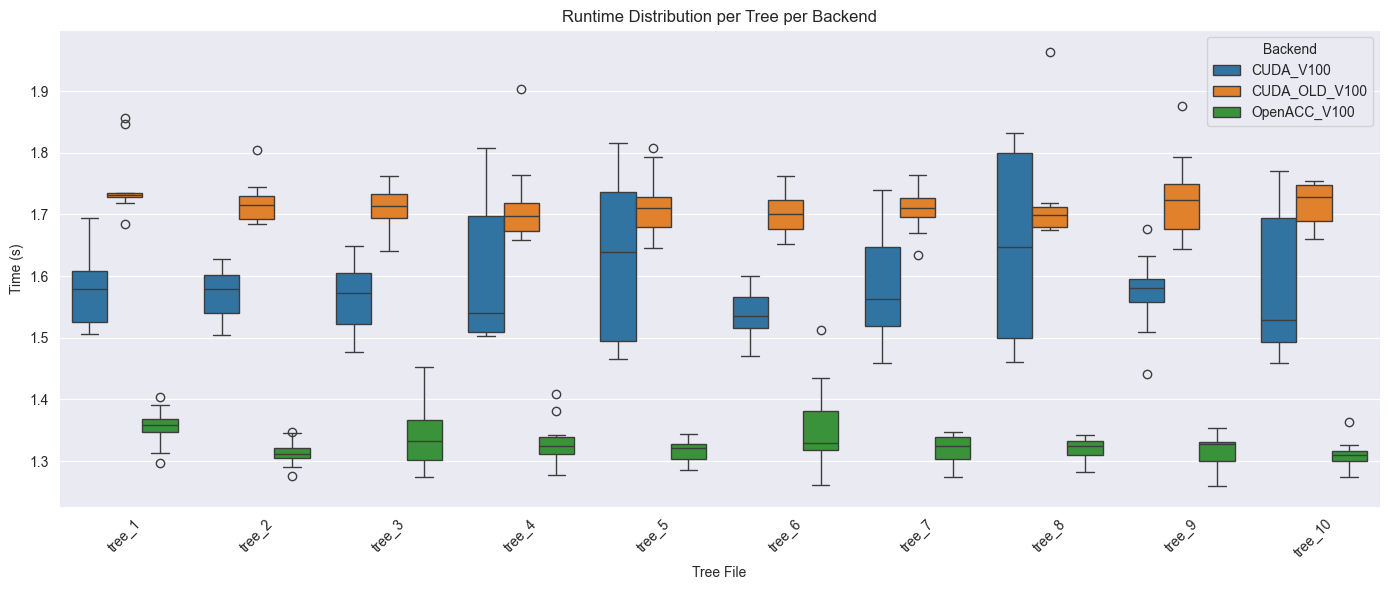

Using columns -> {'tree': 'treefile', 'backend': 'backend', 'time': 'time'}
Rows plotted: 300


In [60]:
plot_runtime_boxplot_auto(df, path=f"{cwd}/aa_boxonly.png")


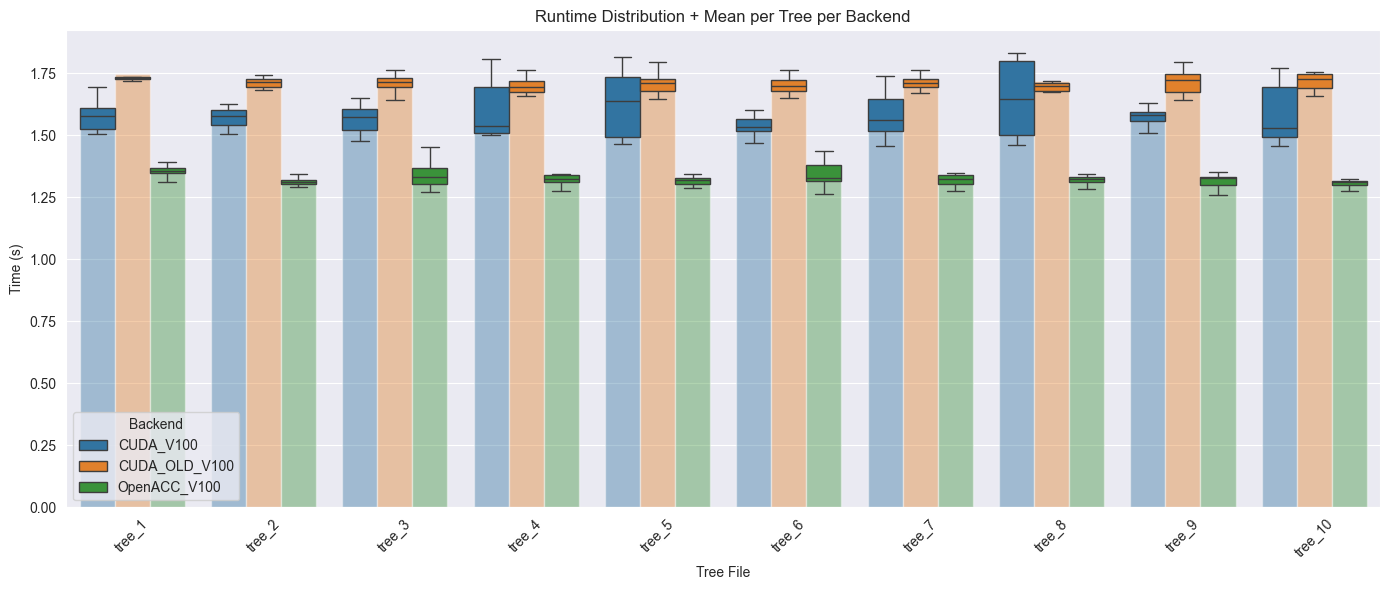

In [61]:
plot_bar_with_box(df, path=f"{cwd}/aa_boxplot.png")


In [62]:
def plot_min_time_per_backend(df, logy=False, path=""):
    groups = df.groupby(['treefile', 'backend'])
    min_times = groups['time'].min().unstack()
    min_times.plot(kind='bar', figsize=(10, 5))
    if logy:
        plt.yscale('log')
    plt.xlabel('Tree File')
    plt.ylabel('Min Time (s)')
    plt.title('Minimum Time per Backend for Each Tree File')
    plt.tight_layout()
    if path:
        plt.savefig(path)
    plt.show()

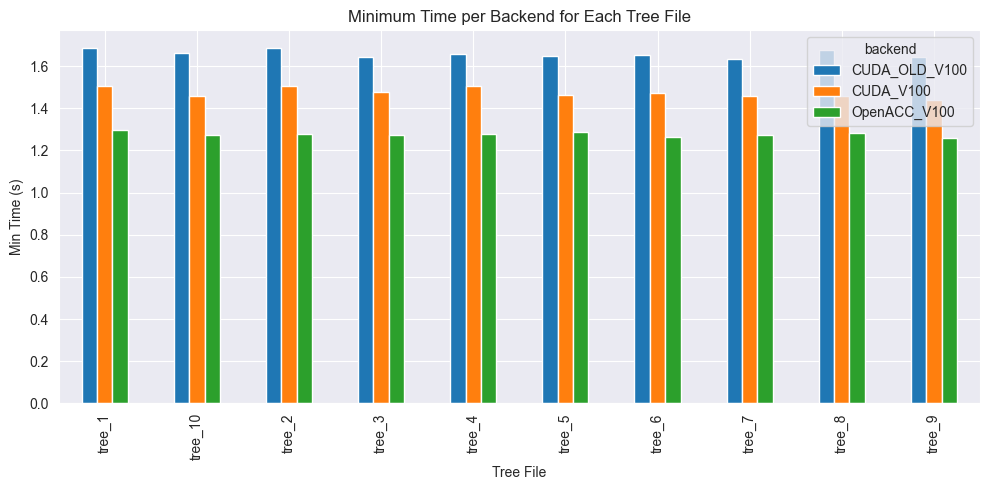

In [63]:
plot_min_time_per_backend(df, logy=False, path=f"{cwd}/min_time_per_backend_100taxa_diff_trees_1M_sites_AA.png")

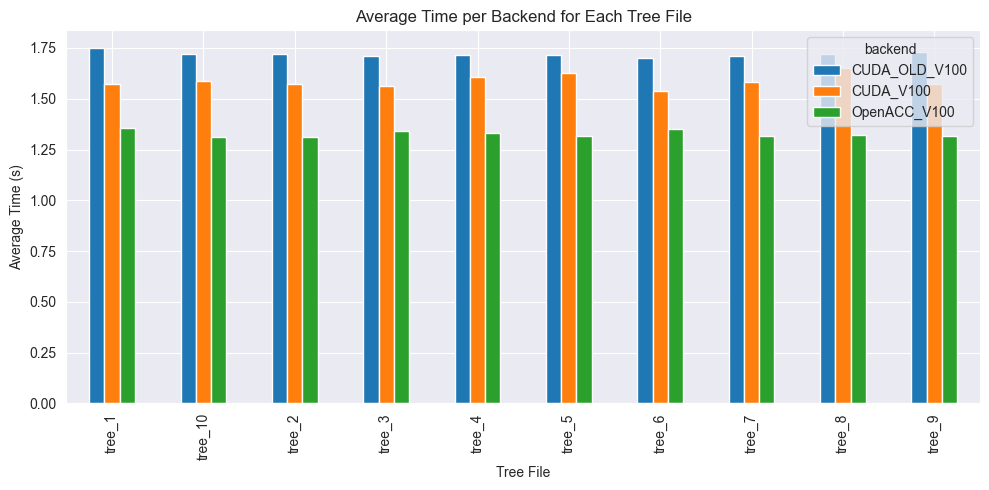

In [64]:
plot_average_time_per_backend(df, logy=False, path=f"{cwd}/average_time_per_backend_100taxa_diff_trees_1M_sites_AA.png")

In [65]:
def plot_max_time_per_backend(df, logy=False, path=""):
    groups = df.groupby(['treefile', 'backend'])
    max_times = groups['time'].max().unstack()
    max_times.plot(kind='bar', figsize=(10, 5))
    if logy:
        plt.yscale('log')
    plt.xlabel('Tree File')
    plt.ylabel('Max Time (s)')
    plt.title('Max Time per Backend for Each Tree File')
    plt.tight_layout()
    if path:
        plt.savefig(path)
    plt.show()

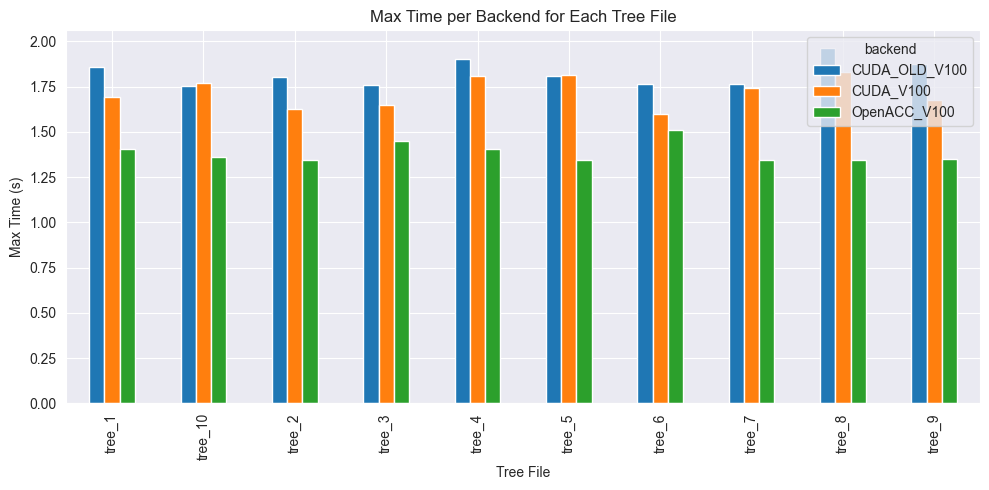

In [66]:

plot_max_time_per_backend(df, logy=False, path=f"{cwd}/average_time_per_backend_100taxa_diff_trees_1M_sites_AA.png")

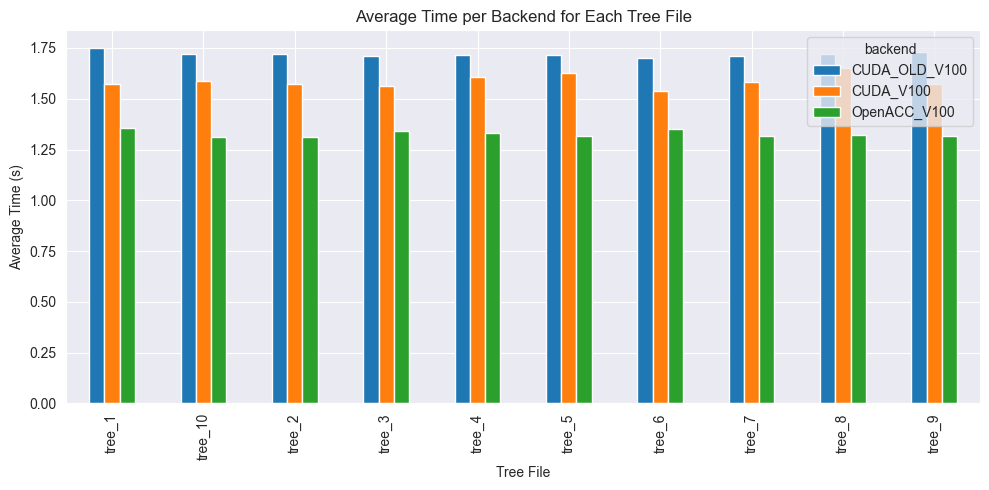

In [67]:
plot_average_time_per_backend_v100(df, logy=False, path=f"{cwd}/average_time_per_backend_v100_100taxa_diff_trees_1M_sites_AA.png")

In [68]:
# boxplot_per_tree_group_backend(df)
# plot_boxplot_time_per_backend(df, logy=False, path=f"{cwd}/boxplot_time_per_backend_100taxa_diff_trees_1M_sites_AA.png")

In [69]:
data = []
read_files_in_directory(f"{results_path}/{DNA_folder}", unique_name="_GPU")
read_files_in_las_reults_directory(f"{last_results_path}/{DNA_folder}")
write_to_csv(data, output_csv_aa)
df = pd.read_csv(output_csv_aa)



Reading file: output_v100_2cudakernels_run9_tree_1_1000000_dna_cublas_v100.txt
tree_1
found a match
CUDA
CUDA_V100 100 1000000 1000000 -70051678.096398800611496 1.379973215000000 tree_1 run9
Reading file: output_v100_2cudakernels_run2_tree_1_1000000_dna_cublas_v100.txt
tree_1
found a match
CUDA
CUDA_V100 100 1000000 1000000 -70051678.096398785710335 1.388769488000000 tree_1 run2
Reading file: output_v100_2cudakernels_run10_tree_1_1000000_dna_cublas_v100.txt
tree_1
found a match
CUDA
CUDA_V100 100 1000000 1000000 -70051678.096398815512657 1.418184467000000 tree_1 run10
Reading file: output_v100_2cudakernels_run4_tree_1_1000000_dna_cublas_v100.txt
tree_1
found a match
CUDA
CUDA_V100 100 1000000 1000000 -70051678.096398845314980 1.487225291000000 tree_1 run4
Reading file: output_v100_2cudakernels_run8_tree_1_1000000_dna_cublas_v100.txt
tree_1
found a match
CUDA
CUDA_V100 100 1000000 1000000 -70051678.096398860216141 1.447851403000000 tree_1 run8
Reading file: output_v100_2cudakernels_run3

In [70]:
df

,backend,taxa,sites,patterns,likelihood,time,treefile,run_number
0,CUDA_V100,100,1000000,1000000,-7.005168e+07,1.379973,tree_1,run9
1,CUDA_V100,100,1000000,1000000,-7.005168e+07,1.388769,tree_1,run2
2,CUDA_V100,100,1000000,1000000,-7.005168e+07,1.418184,tree_1,run10
3,CUDA_V100,100,1000000,1000000,-7.005168e+07,1.487225,tree_1,run4
4,CUDA_V100,100,1000000,1000000,-7.005168e+07,1.447851,tree_1,run8
...,...,...,...,...,...,...,...,...
295,CUDA_OLD_V100,100,1000000,1000000,-6.804077e+07,1.582422,tree_10,run10
296,OpenACC_V100,100,1000000,1000000,-6.804077e+07,1.196379,tree_10,run4
297,OpenACC_V100,100,1000000,1000000,-6.804077e+07,1.144419,tree_10,run2
298,CUDA_OLD_V100,100,1000000,1000000,-6.804077e+07,1.622179,tree_10,run3


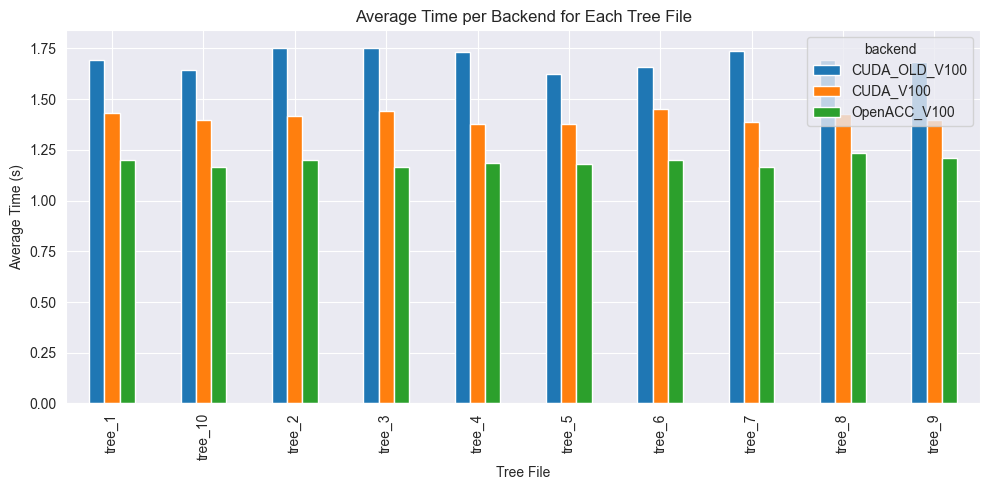

In [71]:
plot_average_time_per_backend(df, logy=False, path=f"{cwd}/average_time_per_backend_100taxa_diff_trees_1M_sites_DNA.png")

In [72]:
# plot_min_time_per_backend(df, logy=False, path=f"{cwd}/min_time_per_backend_100taxa_diff_trees_1M_sites_DNA.png")

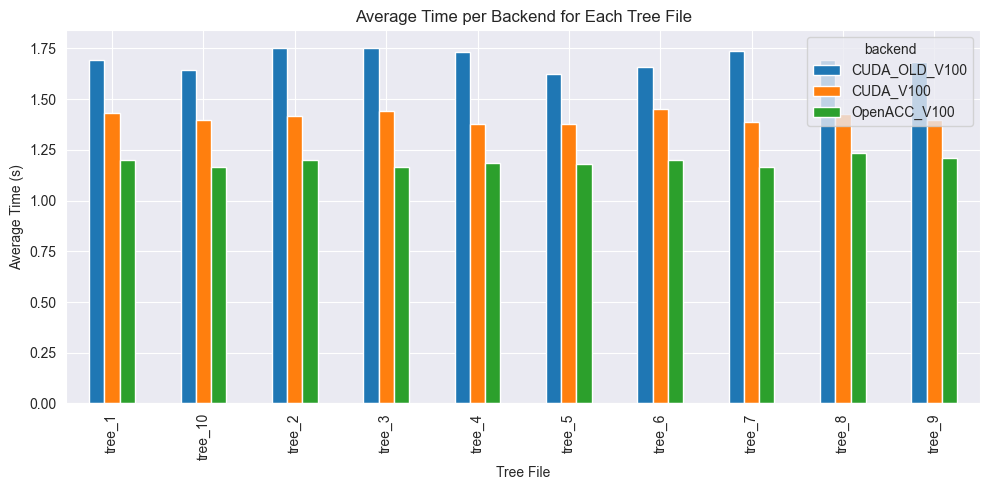

In [73]:
plot_average_time_per_backend_v100(df, logy=False, path=f"{cwd}/average_time_per_backend_v100_100taxa_diff_trees_1M_sites_DNA.png")

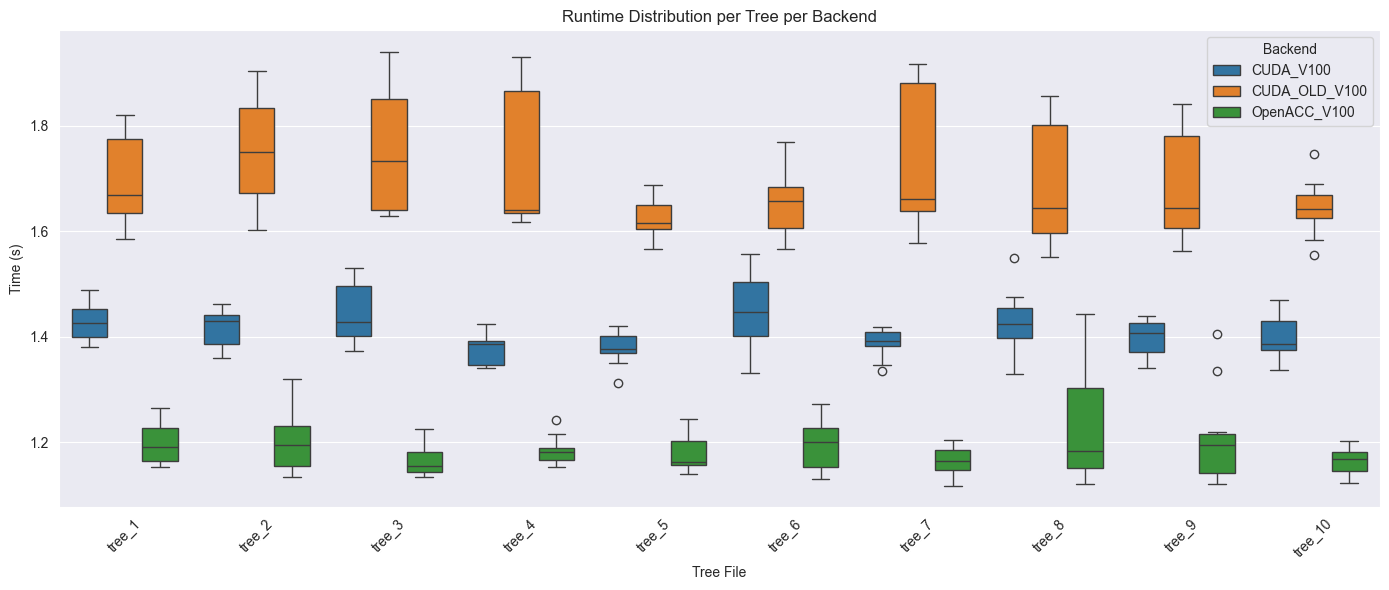

Using columns -> {'tree': 'treefile', 'backend': 'backend', 'time': 'time'}
Rows plotted: 300


In [74]:
plot_runtime_boxplot_auto(df, path="DNA_boxonlyplot.png")


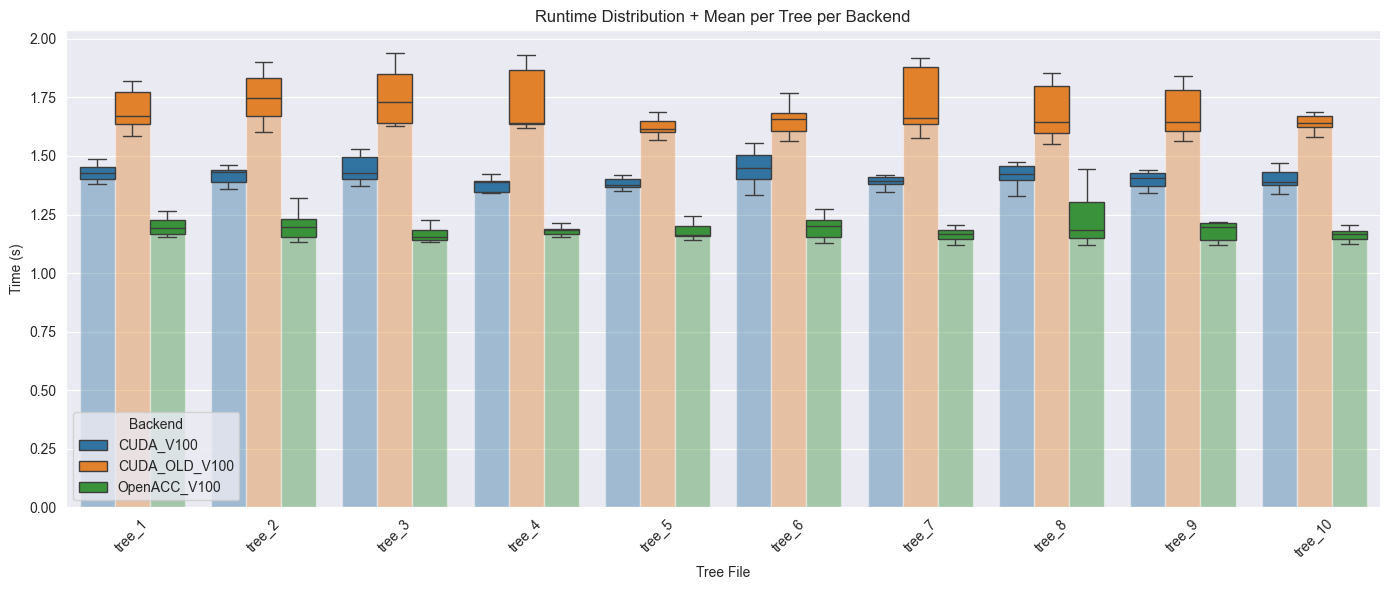

In [75]:
plot_bar_with_box(df, path="DNA_boxplot.png")